In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import math
# import metrics
# from metrics import *
import ast
import sklearn
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import hamming_loss
#from annoy import AnnoyIndex
import tensorflow_hub as hub
import tensorflow as tf
import json
import torch

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Project-data/Wiki-text/104_117_removed_duplicates_without_other_party_annotated.json') as fin:
  data = json.load(fin)

In [ ]:
print(len(data))

1376


In [ ]:
data[0]

{'Background': '\nHeflin was born on June 19, 1921, in Poulan, Georgia.  He attended public school in Alabama, graduating from Colbert County High School in Leighton.[1]  He earned his Bachelor of Arts degree in 1942 from Birmingham-Southern College in Birmingham.[2]  There was a tradition of politics in his family: he was a nephew of James Thomas Heflin, a prominent white supremacist politician and U.S. Senator, and great-nephew of Robert Stell Heflin, a U.S. Representative.\n\nDuring World War II, from 1942 to 1946, Heflin served as an officer in the United States Marine Corps.[3] He was awarded the Silver Star for valor in combat and received two Purple Heart medals,[4] having seen action on Bougainville and Guam.\n\nAfter World War II, Heflin attended the University of Alabama School of Law, from which he graduated in 1948. For nearly two decades, he served as a law professor, while concurrently practicing law in Tuscumbia, Alabama.[4]\n\nThe University of Alabama School of Law has

In [ ]:
# names = []
# duplicate = []
# index = []
# for i,member in enumerate(data):
#   if member['Name'] not in names:
#     names.append(member['Name'])
#     index.append(i)
#   else:
#     duplicate.append(member['Name'])
# print(duplicate)

['Carol Moseley Braun', 'Jim Inhofe', 'Bob Matsui', 'Luis Gutiérrez', 'Phil Crane', 'Sidney R. Yates', 'Harris W. Fawell', 'Sheila Jackson Lee', 'Richard Lugar', 'Bill Lipinski', 'Pete Hoekstra', 'Dave Camp', 'Nick Smith (American politician)', 'Jim Saxton', 'Fritz Hollings', 'Buck McKeon', 'Norm Dicks', 'Jim Talent', 'J. D. Hayworth', 'Ed Royce', 'Duke Cunningham', 'Susan Davis (politician)', 'John B. Larson', 'Clay Shaw (politician)', 'Jan Schakowsky', 'Tim Johnson (Illinois politician)', 'Don Manzullo', 'Dan Burton', 'Chris John', 'Jim McGovern (American politician)', 'Stephen F. Lynch', 'Tom Osborne', 'Mike Ferguson (New Jersey politician)', 'Bill Pascrell', 'Rush Holt Jr.', 'Joe Hoeffel', 'Mike Doyle (American politician)', 'Pat Toomey', 'Joe Pitts (Pennsylvania politician)', 'Joe Wilson (American politician)', 'Jim Turner (politician)', 'Eni Faleomavaega', 'Chris Dodd', 'Bob Bennett (politician)', 'Herb Kohl', 'Mike Rogers (Alabama politician)', 'Robert E. Cramer', 'Butch Otter',

In [ ]:
# len(index)

1376

In [ ]:
# temp_data = []
# for i in index:
#   temp_data.append(data[i])

In [ ]:
# with open("/content/drive/MyDrive/Project-data/Wiki-text/104_117_removed_duplicates_without_other_party_annotated.json", 'w') as outfile:
#     json.dump(temp_data, outfile)

In [ ]:
text = []
for i,representative in enumerate(data):
  #inner_text = []
  inner_text = ""
  for keys in representative.keys():
    if(keys not in ['Name','PersonalDetails']):
      #inner_text.append(representative[keys])
      #print(representative[keys])
      inner_text += str(representative[keys]) + " "  
  text.append(inner_text)

In [ ]:
other_length=[]
political_length=[]
background_length=[]

other_greater_than_4096 = 0
background_greater_than_4096 = 0
political_greater_than_4096 = 0

political=[]
background = []
max_length=0
for i in range(len(data)):
  political.append(len(data[i]['Political']))
  background.append(len(data[i]['Background']))
  if(len(data[i]['Others'])>4096):
    other_greater_than_4096+=1
    other_length.append(i)

  if(len(data[i]['Background'])>4096):
    background_greater_than_4096+=1
    background_length.append(i)

  if(len(data[i]['Political'])>4096):
    if len(data[i]['Political'])>max_length:
      max_length=len(data[i]['Political'])
    political_greater_than_4096+=1
    political_length.append(i)

print(other_greater_than_4096)
print(background_greater_than_4096)
print(political_greater_than_4096)

85
296
862


In [ ]:
print(max_length)

70482


In [ ]:
common=list(set(political_length) & set(background_length))
print(common)

[1, 4, 517, 7, 8, 1031, 10, 523, 524, 1035, 14, 1037, 1039, 17, 20, 21, 1046, 535, 24, 537, 1049, 27, 29, 30, 543, 1055, 1057, 35, 1059, 1061, 38, 39, 552, 1063, 554, 43, 44, 1066, 46, 559, 49, 1073, 51, 52, 1075, 55, 1080, 1081, 58, 572, 61, 1086, 64, 578, 579, 1091, 69, 70, 71, 72, 73, 74, 583, 1093, 589, 1094, 594, 598, 610, 1123, 612, 102, 616, 106, 620, 110, 622, 1136, 625, 116, 628, 629, 631, 1141, 1148, 1149, 638, 639, 642, 1157, 646, 1159, 1162, 140, 142, 143, 145, 1169, 149, 150, 1174, 1175, 1176, 1180, 671, 1187, 1188, 677, 678, 1191, 1192, 682, 172, 685, 1198, 690, 694, 188, 189, 1213, 1215, 193, 706, 1218, 196, 198, 1222, 200, 1223, 1227, 717, 209, 213, 214, 215, 727, 1238, 221, 1252, 742, 1254, 744, 236, 239, 240, 752, 1267, 245, 1270, 247, 250, 252, 764, 255, 767, 769, 259, 772, 773, 774, 1291, 1297, 786, 275, 1300, 277, 790, 1311, 1314, 804, 806, 296, 1323, 813, 814, 816, 817, 1328, 1332, 309, 822, 824, 825, 314, 827, 318, 831, 832, 322, 836, 838, 839, 328, 841, 330, 845

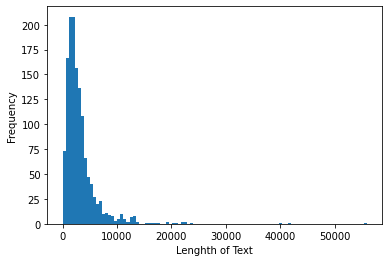

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(background, bins=100,density=False)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Lenghth of Text');

In [ ]:
print(max(political_length))

1375


In [ ]:
# Y = []
# for i,t in enumerate(data):
#   try:
#     Y.append(t['PersonalDetails']['Political party'])
#   except:
#     Y.append("Party-NA")
# print(Y)

In [ ]:
# '''
# Solved people who did not shift parties
# '''
# rcount=0
# dcount = 0
# other_count = 0
# other=[]
# for i in range(len(Y)):
#   if (Y[i] == 'Republican' or Y[i] == 'Republican[1]'):
#       # print(Y[i])
#       rcount +=1
#   elif (Y[i] == 'Democratic' or Y[i] == 'Democratic[1]'):
#       # print(Y[i])
#       dcount+=1
#   else:
#     # print(Y[i])
#     # print(data[i]['Name'])
#     other.append(i)
#     other_count += 1
# print(rcount," republicans")
# print(dcount," democrats")
# print(other_count,"others")
# print(other)

805  republicans
704  democrats
0 others
[]


In [ ]:
# "DELETE those who shifted party"
# new_data=[]
# for idx in range(len(data)):
#   if idx not in other:
#       new_data.append(data[idx])

In [ ]:
# print(len(new_data))

1509


In [ ]:
# with open("/content/drive/MyDrive/Project-data/Wiki-text/104_117_without_other_party_annotated.json", 'w') as outfile:
    # json.dump(new_data, outfile)

In [ ]:
Y = []
for i,t in enumerate(data):
  try:
    Y.append(t['PersonalDetails']['Political party'])
  except:
    Y.append("Party-NA")
print(Y)

['Democratic', 'Republican', 'Republican', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Republican', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Democratic', 'Republican', 'Republican', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Republican', 'Republican', 'Republican', 'Republican', 'Democratic', 'Republican', 'Republican', 'Democratic', 'Democratic', 'Democratic', 'Republican', 'Republican', 'Repu

In [ ]:
new_y = Y
for i in range(len(Y)):
  if(Y[i][0]=='D'):
    new_y[i] = 0
  else:
    new_y[i] = 1
print(new_y)

[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [ ]:
print(len(new_y))

1376


In [ ]:
# !pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.1 MB/s 
     |████████████████████████████████| 1.2 MB 16.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=37b661fe4ca93ccd60e8aec5b1bc04acd0b19a0210e7ee8e9e73b91293e9eee7
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [ ]:
background_text = []
political_text = []
others_text = []

for i,representative in enumerate(data):
  #inner_text = []
  b_text = ""
  p_text = ""
  o_text = ""
  for keys in representative.keys():
    if keys=='Background':
      b_text += str(representative[keys]) + " "
    if keys=='Political':
      p_text += str(representative[keys]) + " "
    if keys=='Others':
      o_text += str(representative[keys]) + " "
  background_text.append(b_text)
  political_text.append(p_text)
  others_text.append(o_text)
      
    # if(keys not in ['Name','PersonalDetails']):
    #   #inner_text.append(representative[keys])
    #   #print(representative[keys])
    #   inner_text += str(representative[keys]) + " "  
  # text.append(inner_text)

In [ ]:
political_text[1]

'\nStevens had been with Charles Clasby\'s law firm for six months when Robert J. McNealy, a Democrat appointed as U.S. Attorney for Fairbanks during the Truman administration,[14] informed U.S. District Judge Harry Pratt he would be resigning effective August 15, 1953,[26] having already delayed his resignation by several months at the request of Justice Department officials newly appointed by Eisenhower. The latter had asked McNealy to delay his resignation until Eisenhower could appoint a replacement.[25] Despite Stevens\'s short tenure as an Alaska resident and his relative lack of trial or criminal law experience, Pratt asked Stevens to serve in the position until Eisenhower acted.[26] Stevens agreed. "I said, \'Sure, I\'d like to do that,\'" Stevens recalled years later. "Clasby said, \'It\'s not going to pay you as much money, but, if you want to do it, that\'s your business.\' He was very pissed that I decided to go."[14] Most members of the Fairbanks Bar Association were outra

In [ ]:
from tqdm import tqdm
#stop_words = set(stopwords.words('english'))
preprocessed_text = []
# tqdm is for printing the status bar
r_count=0
d_count=0
trump_count=0
obama_count=0
bill_count=0

####### 

text=background_text   ###background_text,political_text,others_text


######

for sent in tqdm(text):
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('\n\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub(r'\d+', '', sent)
    sent = sent.replace('  ', ' ')
    if 'republic' in sent.lower():
      # print(sent)
      sent=sent.replace('republican',' ')
      sent=sent.replace('republic',' ')
      sent=sent.replace('Republic',' ')
      sent=sent.replace('Republican',' ')
      r_count+=1
      # print(sent)
      
    if 'democrat' in sent.lower():
      d_count+=1
      sent=sent.replace('democrat',' ')
      sent=sent.replace('Democrat',' ')
      sent=sent.replace('Democratic',' ')
      sent=sent.replace('democratic',' ')

    if 'trump' or 'donald' in sent.lower():
      trump_count+=1
      sent=sent.replace('Trump',' ')
      sent=sent.replace('trump',' ')
      sent=sent.replace('Donald Trump',' ')
      sent=sent.replace('donald trump',' ')
      sent=sent.replace('Donald',' ')
      sent=sent.replace('donald',' ')

    if 'obama' in sent.lower():
      obama_count+=1
      sent=sent.replace('Obama',' ')
      sent=sent.replace('obama',' ')
      sent=sent.replace('Barack Obama',' ')
      sent=sent.replace('barack obama',' ')
      sent=sent.replace('Barack',' ')
      sent=sent.replace('barack',' ')

    if 'clinton' in sent.lower():
      bill_count+=1
      sent=sent.replace('Clinton',' ')
      sent=sent.replace('clinton',' ')
      sent=sent.replace('bill clinton',' ')
      sent=sent.replace('Bill Clinton',' ')
      sent=sent.replace('William Clinton',' ')
      sent=sent.replace('william clinton',' ')
      sent=sent.replace('William',' ')
      sent=sent.replace('william',' ')


    preprocessed_text.append(sent.lower().strip())

#print(preprocessed_answers)
print(r_count)
print(d_count)   
print(trump_count)
print(obama_count) 
print(bill_count)

100%|██████████| 1376/1376 [00:00<00:00, 2981.38it/s]

254
242
1376
39
57


In [ ]:
# r_count=0
# d_count=0
# trump_count=0
# obama_count=0
# bill_count=0
# for sent in tqdm(preprocessed_text):
#     if 'republic' in sent.lower():
#       r_count+=1
#       # sent=sent.replace('republic',' ')
      
#     if 'democrat' in sent.lower():
#       d_count+=1
#       # sent=sent.replace('democrat','')
      
#     if 'donald' in sent.lower():
#       trump_count+=1
#       # sent=sent.replace('trump','')

#     if 'barack'  in sent.lower():
#       obama_count+=1
#       # sent=sent.replace('obama','')

#     if 'clinton' in sent.lower():
#       bill_count+=1


# print(r_count)
# print(d_count)   
# print(trump_count)
# print(obama_count) 
# print(bill_count)

100%|██████████| 1509/1509 [00:00<00:00, 47250.85it/s]

0
0
0
0
0


In [ ]:
preprocessed_text[5]

'pryor was born in camden the seat of ouachita county in southern arkansas to william edgar pryor and the former susan pryor n e newton both had deep roots in arkansas the marriage united two of the pioneer families of arkansas william pryor moved to camden from holly springs in and started selling cars by he had bought the partners out of the business and become sole owner of edgar pryor inc a well known chevrolet dealership in the area the family was also involved in the civic religious and political life of camden with w e serving as ouachita county sheriff from to  david was a third generation ouachita county resident he attended public schools in camden attended henderson state teacher s college in arkadelphia and graduated from the university of arkansas in fayetteville in pryor was founder and publisher of the ouachita citizen from to he graduated from law school at the university of arkansas in and was admitted to the bar that same year in pryor married barbara jean lunsford wh

In [ ]:
other_length=[]
political_length=[]
background_length=[]

other_greater_than_4096 = 0
background_greater_than_4096 = 0
political_greater_than_4096 = 0
max_length=0
for i in range(len(preprocessed_text)):
  # # if(len(preprocessed_text[i]['Others'])>4096):
  # #   other_greater_than_4096+=1
  # #   other_length.append(i)

  # if(len(preprocessed_text[i]['Background'])>4096):
  #   background_greater_than_4096+=1
  #   background_length.append(i)

  if(len(preprocessed_text[i])>4096):
    if len(preprocessed_text[i])>max_length:
      max_length=len(preprocessed_text[i])
    political_greater_than_4096+=1
    political_length.append(i)

print(other_greater_than_4096)
print(background_greater_than_4096)
print(political_greater_than_4096)

0
0
254


In [ ]:
preprocessed_text[0]

'heflin was born on june  in poulan georgia he attended public school in alabama graduating from colbert county high school in leighton he earned his bachelor of arts degree in from birmingham southern college in birmingham there was a tradition of politics in his family he was a nephew of james thomas heflin a prominent white supremacist politician and u s senator and great nephew of robert stell heflin a u s representative during world war ii from to heflin served as an officer in the united states marine corps he was awarded the silver star for valor in combat and received two purple heart medals having seen action on bougainville and guam after world war ii heflin attended the university of alabama school of law from which he graduated in for nearly two decades he served as a law professor while concurrently practicing law in tuscumbia alabama the university of alabama school of law has honored heflin with the howell heflin conference room in the bounds law library tuscumbia named 

In [ ]:
print(max_length)

50549


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/650 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
model.max_seq_length = 512

In [ ]:
roberta_encodings = []
for i,t in enumerate(preprocessed_text):
  roberta_encodings.append(model.encode(t))

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 56.7 MB/s 
     |████████████████████████████████| 61 kB 488 kB/s 
     |████████████████████████████████| 596 kB 40.5 MB/s 
     |████████████████████████████████| 895 kB 50.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# from transformers import AutoTokenizer, AutoModel
  
# tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096")

# model = AutoModel.from_pretrained("allenai/longformer-base-4096")
from transformers import AutoTokenizer, AutoModelForMaskedLM
  
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

model = AutoModelForMaskedLM.from_pretrained("distilroberta-base")

In [ ]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [ ]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model.to(device)

In [ ]:
longformer_embeddings = []
for i,t in enumerate(preprocessed_text):  
  encoded_input = tokenizer(t, padding=True, truncation=True, max_length=4096, return_tensors='pt')

  with torch.no_grad():
      encoded_input=encoded_input.to(device)
      model_output = model(**encoded_input)

  # mean pooling
  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
  longformer_embeddings.append(sentence_embeddings)

RuntimeError: ignored

In [ ]:
longformer_embeddings = []
for i,t in enumerate(preprocessed_text):  
  encoded_input = tokenizer(t, padding=True, truncation=True, max_length=4096, return_tensors='pt')

  with torch.no_grad():
      encoded_input=encoded_input.to(device)
      model_output = model(**encoded_input)

  # mean pooling
  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
  longformer_embeddings.append(sentence_embeddings)  

TypeError: ignored

In [ ]:
# ######### New for increased token lengths
# longformer_embeddings = []
# for i,t in enumerate(preprocessed_text):  
#   if(len(t)<=4096):
#     encoded_input = tokenizer(t, padding=True, truncation=True, max_length=4096, return_tensors='pt')

#     with torch.no_grad():
#         encoded_input=encoded_input.to(device)
#         model_output = model(**encoded_input)

#     # mean pooling
#     sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
#     x = sentence_embeddings
#     new_sentence_embeddings = torch.cat((x,x,x,x,x),axis=1)
#     longformer_embeddings.append(new_sentence_embeddings)
#   else:
#     nums = len(t)/4096
#     for k in nums:
#         encoded_input = tokenizer(t, padding=True, truncation=True, max_length=128, return_tensors='pt')

#         with torch.no_grad():
#             encoded_input=encoded_input.to(device)
#             model_output = model(**encoded_input)

#         # mean pooling
#         sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
#         x = sentence_embeddings
#         new_sentence_embeddings = torch.cat((x,x,x,x,x),axis=1)
#         longformer_embeddings.append(new_sentence_embeddings)

In [ ]:
longformer_embeddings_numpy = []
for embedding in longformer_embeddings:
  longformer_embeddings_numpy.append(embedding.cpu().detach().numpy())

In [ ]:
longformer_embeddings_numpy = np.array(longformer_embeddings_numpy)
# np.save("/content/drive/MyDrive/longformer_embeddings_18_nov.npy", longformer_embeddings_numpy)

In [ ]:
for i in range(len(longformer_embeddings_numpy)):
  longformer_embeddings_numpy[i] = longformer_embeddings_numpy[i].reshape((768,))

In [ ]:
longformer_embeddings_numpy = longformer_embeddings_numpy.reshape((1509,768))

ValueError: ignored

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(longformer_embeddings_numpy[:1300], new_y[:1300])

In [ ]:
# clf.score(longformer_embeddings_numpy[1300:],new_y[1300:])

In [ ]:
# clf.score(longformer_embeddings_numpy[:1300],new_y[:1300])

In [ ]:
from sklearn.utils import shuffle
X_new, Y_new = shuffle(roberta_encodings, new_y)

In [ ]:
X_train = X_new[:1000]
X_test = X_new[1000:]
Y_train = Y_new[:1000]
Y_test = Y_new[1000:]

In [ ]:
X_train = X_new[:1300]
X_test = X_new[1300:]
Y_train = Y_new[:1300]
Y_test = Y_new[1300:]

In [ ]:
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf.score(X_test,Y_test)

0.7368421052631579